# The overall goal of the notebook is to first find the percentage of degrees awarded to people of two or more races to total degrees ratio and also find this percentage with Non-U.S Residents. Then after that I would clean up this graph
#The second goal of this notebook is to compare variables to each other like institution type and control size to see if there were any important correlations


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/Shareddrives/MATH 2327 3439 - Data/'

Mounted at /content/drive


In [ ]:
# Data file 1

In [ ]:
degree_df = pd.read_csv("/content/drive/Shareddrives/MATH 2327 3439 - Data/data/university_graduation/degree completions.csv")
degree_df.head(5)

,UNITID,XCSTOTLT,CSTOTLT,XCSTOTLM,CSTOTLM,XCSTOTLW,CSTOTLW,XCSAIANT,CSAIANT,XCSAIANM,...,XCSUNKNM,CSUNKNM,XCSUNKNW,CSUNKNW,XCSNRALT,CSNRALT,XCSNRALM,CSNRALM,XCSNRALW,CSNRALW
0,100654,R,821,R,264,R,557,R,2,R,...,R,17,R,60,R,20,R,9,R,11
1,100663,R,6039,R,2109,R,3930,R,16,R,...,R,45,R,53,R,353,R,193,R,160
2,100690,R,217,R,83,R,134,R,1,R,...,R,3,R,3,R,0,R,0,R,0
3,100706,R,2222,R,1145,R,1077,R,24,R,...,R,12,R,52,R,94,R,63,R,31
4,100724,R,652,R,216,R,436,R,0,R,...,R,5,R,6,R,10,R,7,R,3


In [ ]:
degree_df.shape

In [ ]:
degree_df.tail()

In [ ]:
degree_df.columns

In [ ]:
degree_df.rename(columns={
    'UNITID': 'institution_id',
    'CSTOTLT': 'total_awards',
    'CSTOTLM': 'awards_men',
    'CSTOTLW': 'awards_women',
    'CSAIANT': 'awards_native_american_total',
    'CSAIANM': 'awards_native_american_men',
    'CSAIANW': 'awards_native_american_women',
    'CSASIAT': 'awards_asian_total',
    'CSASIAM': 'awards_asian_men',
    'CSASIAW': 'awards_asian_women',
    'CSBKAAT': 'awards_black_total',
    'CSBKAAM': 'awards_black_men',
    'CSBKAAW': 'awards_black_women',
    'CSHISPT': 'awards_hispanic_total',
    'CSHISPM': 'awards_hispanic_men',
    'CSHISPW': 'awards_hispanic_women',
    'CSNHPIT': 'awards_pacific_islander_total',
    'CSNHPIM': 'awards_pacific_islander_men',
    'CSNHPIW': 'awards_pacific_islander_women',
    'CSWHITT': 'awards_white_total',
    'CSWHITM': 'awards_white_men',
    'CSWHITW': 'awards_white_women',
    'CS2MORT': 'awards_two_or_more_races_total', #Jose
    'CS2MORM': 'awards_two_or_more_races_men',
    'CS2MORW': 'awards_two_or_more_races_women',
    'CSUNKNT': 'awards_unknown_total',# Jose
    'CSUNKNM': 'awards_unknown_men',
    'CSUNKNW': 'awards_unknown_women',
    'CSNRALT': 'awards_nonresident_alien_total', #Jose
    'CSNRALM': 'awards_nonresident_alien_men',
    'CSNRALW': 'awards_nonresident_alien_women'
}, inplace=True)

degree_df.head()

,institution_id,XCSTOTLT,total_awards,XCSTOTLM,awards_men,XCSTOTLW,awards_women,XCSAIANT,awards_native_american_total,XCSAIANM,...,XCSUNKNM,awards_unknown_men,XCSUNKNW,awards_unknown_women,XCSNRALT,awards_nonresident_alien_total,XCSNRALM,awards_nonresident_alien_men,XCSNRALW,CSNRALW
0,100654,R,821,R,264,R,557,R,2,R,...,R,17,R,60,R,20,R,9,R,11
1,100663,R,6039,R,2109,R,3930,R,16,R,...,R,45,R,53,R,353,R,193,R,160
2,100690,R,217,R,83,R,134,R,1,R,...,R,3,R,3,R,0,R,0,R,0
3,100706,R,2222,R,1145,R,1077,R,24,R,...,R,12,R,52,R,94,R,63,R,31
4,100724,R,652,R,216,R,436,R,0,R,...,R,5,R,6,R,10,R,7,R,3


In [ ]:
# data file 2

In [ ]:
uni_df = pd.read_csv("/content/drive/Shareddrives/MATH 2327 3439 - Data/data/university_graduation/university info.csv", encoding='latin')
uni_df.head(5)

,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,...,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG
0,100654,Alabama A & M University,AAMU,4900 Meridian Street,Normal,AL,35762,1,5,"Dr. Andrew Hugine, Jr.",...,1,290,-2,1089,Madison County,105,-86.568502,34.783368,109,1
1,100663,University of Alabama at Birmingham,UAB,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,5,Ray L. Watts,...,1,142,-2,1073,Jefferson County,107,-86.799345,33.505697,93,1
2,100690,Amridge University,Southern Christian University Regions University,1200 Taylor Rd,Montgomery,AL,36117-3553,1,5,Michael C.Turner,...,1,388,-2,1101,Montgomery County,102,-86.174010,32.362609,127,2
3,100706,University of Alabama in Huntsville,UAH University of Alabama Huntsville,301 Sparkman Dr,Huntsville,AL,35899,1,5,Darren Dawson,...,1,290,-2,1089,Madison County,105,-86.640449,34.724557,93,2
4,100724,Alabama State University,,915 S Jackson Street,Montgomery,AL,36104-0271,1,5,Quinton T. Ross,...,1,388,-2,1101,Montgomery County,107,-86.295677,32.364317,99,1


In [ ]:
uni_df.shape

(6289, 74)

In [ ]:
uni_df.tail()

In [ ]:
uni_df.columns

In [ ]:
uni_df.rename(columns={
    'UNITID': 'institution_id',
    'INSTNM': 'institution_name',
    'CITY': 'city',
    'STABBR': 'state',
    'ZIP': 'zip_code',
    'SECTOR': 'sector',
    'CONTROL': 'control',  # Public/Private
    'HBCU': 'hbcu',  # Historically Black College or University
    'TRIBAL': 'tribal_college',
    'LOCALE': 'locale_code',
    'WEBADDR': 'website',
    'ADMINURL': 'admin_url',
    'FAIDURL': 'faid_url',  # Financial Aid URL
    'INSTSIZE': 'institution_size',
    'CARNEGIE': 'carnegie_classification',
    'LATITUDE': 'latitude',
    'LONGITUD': 'longitude'
}, inplace=True)

uni_df.head()

,institution_id,institution_name,IALIAS,ADDR,city,state,zip_code,FIPS,OBEREG,CHFNM,...,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,longitude,latitude,DFRCGID,DFRCUSCG
0,100654,Alabama A & M University,AAMU,4900 Meridian Street,Normal,AL,35762,1,5,"Dr. Andrew Hugine, Jr.",...,1,290,-2,1089,Madison County,105,-86.568502,34.783368,109,1
1,100663,University of Alabama at Birmingham,UAB,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,5,Ray L. Watts,...,1,142,-2,1073,Jefferson County,107,-86.799345,33.505697,93,1
2,100690,Amridge University,Southern Christian University Regions University,1200 Taylor Rd,Montgomery,AL,36117-3553,1,5,Michael C.Turner,...,1,388,-2,1101,Montgomery County,102,-86.174010,32.362609,127,2
3,100706,University of Alabama in Huntsville,UAH University of Alabama Huntsville,301 Sparkman Dr,Huntsville,AL,35899,1,5,Darren Dawson,...,1,290,-2,1089,Madison County,105,-86.640449,34.724557,93,2
4,100724,Alabama State University,,915 S Jackson Street,Montgomery,AL,36104-0271,1,5,Quinton T. Ross,...,1,388,-2,1101,Montgomery County,107,-86.295677,32.364317,99,1


## Questions

###Question 1: What percentage of total degrees are earned by people of two or more races depending on the instiution type?


In [ ]:


degree_df.rename(columns={'UNITID': 'institution_id'}, inplace=True)

merged_df = pd.merge(degree_df, uni_df[['institution_id', 'control']], on='institution_id', how='left')

# Calculate total awards for two or more races by institution control type
control_race_stats = merged_df.groupby('control')['awards_two_or_more_races_total'].mean()
#Group it by ethnicity
for x in merged_df['control'].unique():
  print(x)
  merged_df[merged_df['control'] == x]
  ctl_df = merged_df[merged_df['control'] == x]
  ctl_num_students = len(ctl_df)
  ctl_two_or_more_races_pct = ctl_df['awards_two_or_more_races_total'].sum() / ctl_df['total_awards'].sum()
  print(ctl_two_or_more_races_pct)







1
0.03538577578570952
2
0.02871598616877216
3
0.031055122520076122


This code analyzes the distrubition of awards by institution type, focusing on the percentage of total awards received by students of two or more races. The goal of this is to extract insights regarding differences among instutition types


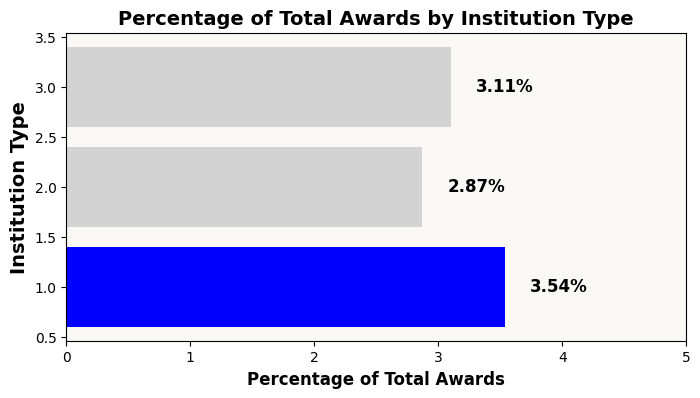

In [ ]:


def calculate_award_percentages(df, group_col, award_col, total_col):  # df: Dataset containing awards data  #group_col : Institution types  award_col= specific awards total_col=total awards

    # Calculates the percentage of total awards for a specific demographic group
    # within different institution types.

    #Returns:
  #DataFrame: Aggregated percentages by institution type.

    grouped_df = df.groupby(group_col)[[award_col, total_col]].sum()
    grouped_df['Percentage'] = (grouped_df[award_col] / grouped_df[total_col]) * 100
    return grouped_df[['Percentage']].reset_index()



merged_df = pd.merge(degree_df, uni_df[['institution_id', 'control']], on='institution_id', how='left')

# Calculate award percentages
award_percentages = calculate_award_percentages(merged_df, 'control', 'awards_two_or_more_races_total', 'total_awards')

# Plotting the results
fig, ax = plt.subplots(figsize=(8, 4))

bars = ax.barh(award_percentages['control'], award_percentages['Percentage'], color=["blue", "lightgray", "lightgray"])

# Annotate bars with percentage values
for bar, pct in zip(bars, award_percentages['Percentage']):
    ax.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, f"{pct:.2f}%", va='center', fontsize=12, fontweight='bold')

# Formatting
ax.set_xlabel("Percentage of Total Awards", fontsize=12, fontweight='bold')
ax.set_ylabel("Institution Type", fontsize=14, fontweight='bold')
ax.set_xticks(range(0, 6, 1))
ax.set_facecolor("#FAF8F5")  # We add Light background for clarity

plt.title("Percentage of Total Awards by Institution Type", fontsize=14, fontweight='bold')
plt.show()

Shows the top 5 Colleges depending on the percentage of two or more races degree awarded

In [ ]:

# Calculate the percentage of Two or More Races awards per university
merged_df['two_or_more_races_pct'] = merged_df['awards_two_or_more_races_total'] / merged_df['total_awards']

# Group by institution and calculate the  percentage
university_race_stats = merged_df.groupby('institution_id')['two_or_more_races_pct'].mean().reset_index()

# Merge with university names
university_race_stats = university_race_stats.merge(uni_df[['institution_id', 'institution_name']], on='institution_id', how='left')

# Sort by highest percentage and select the top 5
top_5_universities = university_race_stats.nlargest(5, 'two_or_more_races_pct')

top_5_universities


,institution_id,two_or_more_races_pct,institution_name
5218,475547,0.936508,Paul Mitchell the School-Fort Myers
4695,449728,0.473684,ATA College
823,141990,0.424125,Windward Community College
3947,383190,0.409722,Hawaii Community College
6013,496186,0.363636,California Institute of Arts & Technology-Nati...



## Insights about this code:
California (CA)
Hawaii (HI) Florida (FL)

High racial Diversity

Paul Mitchell The School, a for-profit vocational school specializing in beauty and cosmetology, has the highest percentage of Two or More Races students.

Schools with smaller enrollments make the percentage of Two or More Races students appear higher compared to large institutions

What drives Graduation Rates Across American Universities For two or more races

Diversity and Location "The Small School effect" (Institution type) Vocational schools attract diverse students because they offer practical, career-focused training that appeals to a wide range of individuals from different backgrounds

3.11% for profit 3.54 For Public 2.87% For private non-profit

This code analyzes the distrubition of awards by institution type, focusing on the percentage of total awards received by students of two or more races. The goal of this is to extract insights regarding differences among instutition types

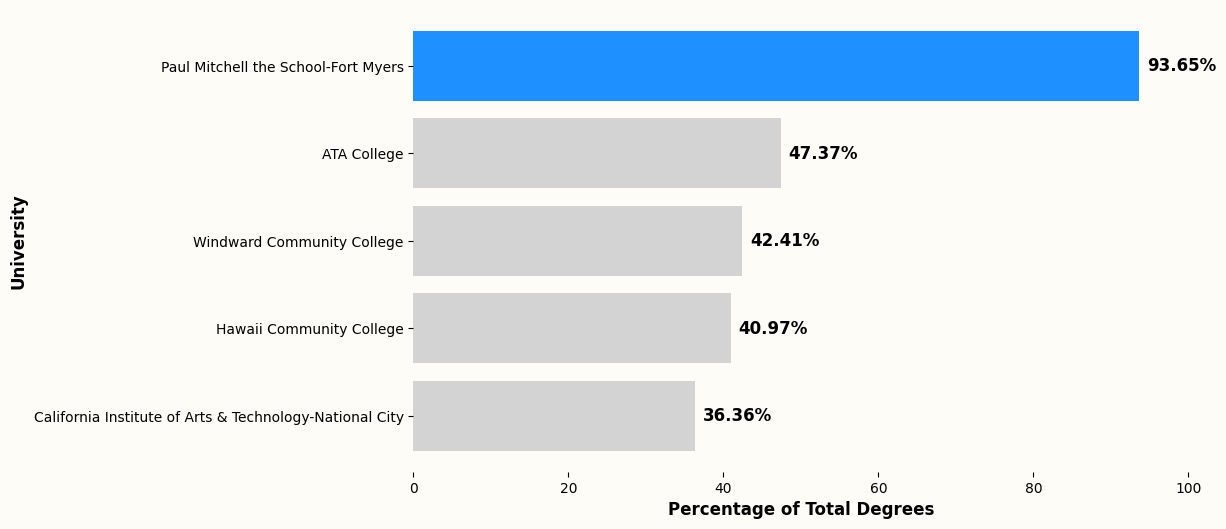

In [ ]:

def calculate_award_percentages(df, group_col, award_col, total_col):

    #Calculates the percentage of total awards for a specific demographic group     within different institution types.


    grouped_df = df.groupby(group_col)[[award_col, total_col]].sum()
    grouped_df['Percentage'] = (grouped_df[award_col] / grouped_df[total_col]) * 100
    return grouped_df[['Percentage']].reset_index()

def top_awarding_universities(df, award_col, total_col, uni_df, top_n=5):

    #Identifies the top universities awarding students of Two or More Races.

    df['two_or_more_races_pct'] = df[award_col] / df[total_col] * 100
    university_race_stats = df.groupby('institution_id', as_index=False)['two_or_more_races_pct'].mean()
    university_race_stats = university_race_stats.merge(uni_df[['institution_id', 'institution_name']], on='institution_id', how='left')
    return university_race_stats.nlargest(top_n, 'two_or_more_races_pct')

def plot_top_universities(df):

   # Plots the top universities awarding Two or More Races students.

    background_color = "#fefcf6"
    df_sorted = df.sort_values('two_or_more_races_pct', ascending=True)
    colors = ['lightgrey'] * (len(df) - 1) + ['dodgerblue']

    fig, ax = plt.subplots(figsize=(10, 6), facecolor=background_color)
    ax.set_facecolor(background_color)

    ax.barh(df_sorted['institution_name'], df_sorted['two_or_more_races_pct'], color=colors)

    ax.set_xlabel("Percentage of Total Degrees", fontsize=12, fontweight='bold', color='black')
    ax.set_ylabel("University", fontsize=12, fontweight='bold', color='black')
    ax.set_xlim(0, 100)

    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

    for i, value in enumerate(df_sorted['two_or_more_races_pct']):
        ax.text(value + 1, i, f"{value:.2f}%", va='center', fontsize=12, fontweight='bold', color='black')

    plt.show()

# Load dataset (Assumed to be preprocessed and named 'merged_df')
merged_df.rename(columns={'UNITID': 'institution_id'}, inplace=True)

# Drop the existing 'control' column to avoid duplication
if 'control' in merged_df.columns:
    merged_df = merged_df.drop(columns=['control'])

# Merge institution type information
merged_df = pd.merge(merged_df, uni_df[['institution_id', 'control']], on='institution_id', how='left')

# Calculate award percentages
award_percentages = calculate_award_percentages(merged_df, 'control', 'awards_two_or_more_races_total', 'total_awards')

# Identify top 5 universities
top_5_universities = top_awarding_universities(merged_df, 'awards_two_or_more_races_total', 'total_awards', uni_df, top_n=5)

# Plot results
plot_top_universities(top_5_universities)


In [ ]:

# Calculate the percentage of Two or More Races awards per university
merged_df['non_residents_pct'] = merged_df['awards_nonresident_alien_total'] / merged_df['total_awards']

# Group by institution and calculate the  percentage
university_race_stats = merged_df.groupby('institution_id')['non_residents_pct'].mean().reset_index()

# Merge with university names
university_race_stats = university_race_stats.merge(uni_df[['institution_id', 'institution_name']], on='institution_id', how='left')

# Sort by highest percentage and select the top 5
top_5_universities = university_race_stats.nlargest(5, 'non_residents_pct')

top_5_universities


,institution_id,non_residents_pct,institution_name
388,120838,1.0,Pacific States University
2718,210508,1.0,Academy of Vocal Arts
4462,443128,1.0,International Technological University
4537,445054,1.0,Toyota Technological Institute at Chicago
5551,486354,1.0,United International College


In [ ]:

# This code is checking our assumptions from the code above
merged_df['non_residents_percentage'] = (merged_df['awards_nonresident_alien_total']/merged_df['total_awards'])*100
merged_df.head()

,institution_id,XCSTOTLT,total_awards,XCSTOTLM,awards_men,XCSTOTLW,awards_women,XCSAIANT,awards_native_american_total,XCSAIANM,...,awards_unknown_women,XCSNRALT,awards_nonresident_alien_total,XCSNRALM,awards_nonresident_alien_men,XCSNRALW,CSNRALW,institution_size,non_residents_pct,non_residents_percentage
0,100654,R,821,R,264,R,557,R,2,R,...,60,R,20,R,9,R,11,3,0.024361,2.436054
1,100663,R,6039,R,2109,R,3930,R,16,R,...,53,R,353,R,193,R,160,5,0.058453,5.845339
2,100690,R,217,R,83,R,134,R,1,R,...,3,R,0,R,0,R,0,1,0.000000,0.000000
3,100706,R,2222,R,1145,R,1077,R,24,R,...,52,R,94,R,63,R,31,3,0.042304,4.230423
4,100724,R,652,R,216,R,436,R,0,R,...,6,R,10,R,7,R,3,2,0.015337,1.533742


### I decided not to include the bargraph below because It would confuse the audience. But my goal for this graph was to create a visualization that would describe that these top5 universities all award 100% total degrees to Non-U.S Residents

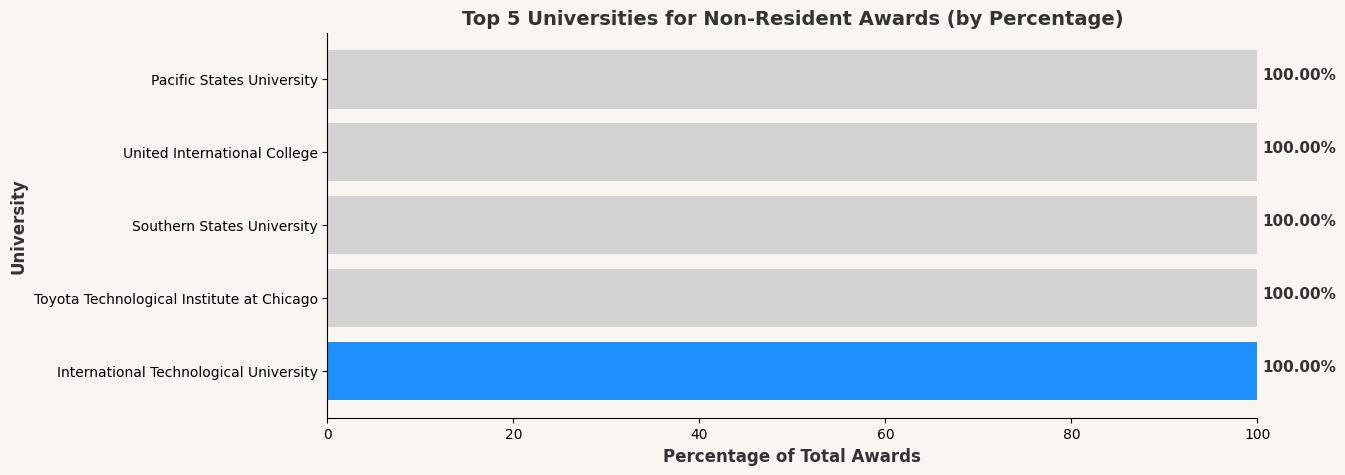

In [ ]:


# Merge datasets
merged_df = pd.merge(degree_df, uni_df[['institution_id', 'institution_name']], on='institution_id', how='left')

# Calculate the percentage of total awards given to non-resident students
merged_df['non_resident_award_percentage'] = (
    merged_df['awards_nonresident_alien_total'] / merged_df['total_awards']
) * 100

# Drop NaN values and filter valid data
valid_non_resident_awards = merged_df[['institution_name', 'non_resident_award_percentage']].dropna()
valid_non_resident_awards = valid_non_resident_awards[valid_non_resident_awards['non_resident_award_percentage'] > 0]

# Sort and get the top 5 universities based on the highest percentage of non-resident awards
top_non_resident_awards = valid_non_resident_awards.sort_values(by='non_resident_award_percentage', ascending=False).head(5)

# Create a horizontal bar chart
plt.figure(figsize=(12, 5), facecolor="#f9f6f1")
bars = plt.barh(
    top_non_resident_awards['institution_name'],
    top_non_resident_awards['non_resident_award_percentage'],
    color=['#1E90FF' if i == 0 else '#D3D3D3' for i in range(len(top_non_resident_awards))]
)

# Formatting
plt.xlabel("Percentage of Total Awards", fontsize=12, fontweight='bold', color="#333333")
plt.ylabel("University", fontsize=12, fontweight='bold', color="#333333")
plt.title("Top 5 Universities for Non-Resident Awards (by Percentage)", fontsize=14, fontweight='bold', color="#333333")
plt.xlim(0, 100)

# Add percentage labels
for bar, value in zip(bars, top_non_resident_awards['non_resident_award_percentage']):
    plt.text(value + 0.5, bar.get_y() + bar.get_height()/2, f"{value:.2f}%", ha='left', fontsize=11, fontweight='bold', color="#333333")

# Remove unnecessary borders and gridlines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)

# Set background color of axes to match theme
plt.gca().set_facecolor("#f9f6f1")


# Show the graph
plt.show()



In [ ]:

# This is the same code to find percentage of non-residents depending on institution control type

merged_df = pd.merge(degree_df, uni_df[['institution_id', 'control']], on='institution_id', how='left')

for x in merged_df['control'].unique():
  print(x)
  merged_df[merged_df['control'] == x]
  ctl_df = merged_df[merged_df['control'] == x]
  ctl_num_students = len(ctl_df)
  ctl_two_or_more_races_pct = ctl_df['awards_nonresident_alien_total'].sum() / ctl_df['total_awards'].sum()
  print(ctl_two_or_more_races_pct)

1
0.05160892459914539
2
0.09561345880909942
3
0.014155992255102624


In [ ]:
def calculate_pct_two_or_more(x):
  awards_two_or_more_races_pct = x['awards_nonresident_alien_total'].sum() / x['total_awards'].sum()
  return awards_two_or_more_races_pct
# Merge degree_df with the necessary columns from uni_df, including 'control'
merged_df = pd.merge(degree_df, uni_df[['institution_id', 'control']], on='institution_id', how='left')

# Now perform the groupby and apply operations:
merged_df.groupby(['control']).apply(lambda x: x['awards_nonresident_alien_total'].sum() / x['total_awards'].sum())


<ipython-input-39-ebbdd647e004>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_df.groupby(['control']).apply(lambda x: x['awards_nonresident_alien_total'].sum() / x['total_awards'].sum())


,0
control,
1,0.051609
2,0.095613
3,0.014156


Question: What are the top universities for people of two or more races based on the average number of awards earned?

  Plots the top universities awarding Two or More Races students based on the average awards earned.
    


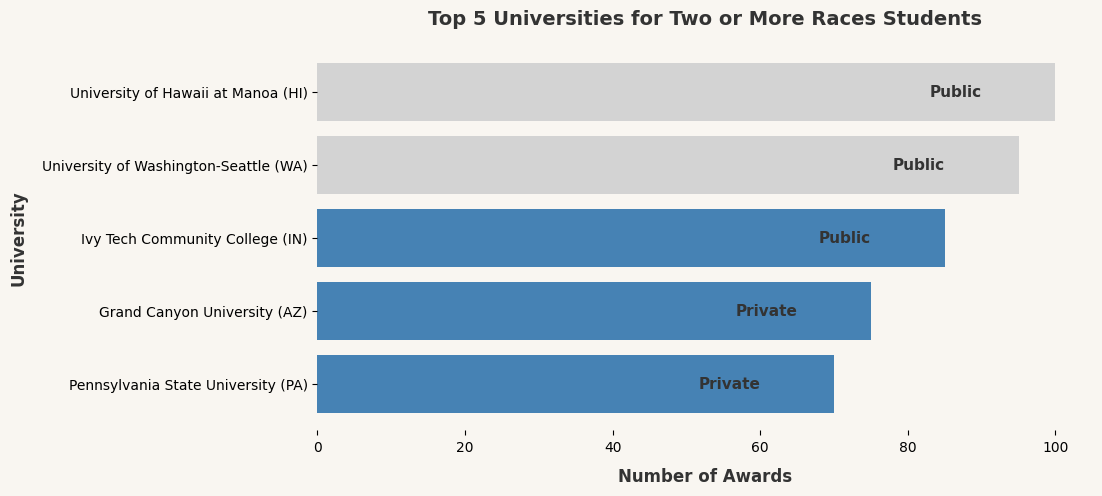

In [ ]:


def plot_top_universities(universities, institution_types, awards):
    """

    Parameters:
    universities (list): List of university names.
    institution_types (list): List of corresponding institution types (Public/Private).
    awards (list): List of awards for visualization.
    """
    background_color = "#f9f6f1"
    colors = ["#4682B4" if inst == "Public" else "#D3D3D3" for inst in institution_types]

    fig, ax = plt.subplots(figsize=(10, 5), facecolor=background_color)
    ax.set_facecolor(background_color)

    bars = ax.barh(universities[::-1], awards[::-1], color=colors)  # Reverse order for correct sorting

    ax.set_xlabel("Number of Awards", fontsize=12, fontweight='bold', labelpad=10, color="#333333")
    ax.set_ylabel("University", fontsize=12, fontweight='bold', labelpad=10, color="#333333")
    ax.set_title("Top 5 Universities for Two or More Races Students", fontsize=14, fontweight='bold', pad=15, color="#333333")

    # Add annotation for public/private institutions
    for bar, inst in zip(bars, institution_types[::-1]):
        ax.text(bar.get_width() - 10, bar.get_y() + bar.get_height()/2, inst,
                ha='right', va='center', fontsize=11, fontweight='bold', color="#333333")

    # Remove unnecessary borders and gridlines
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.grid(False)

    plt.show()

# Define the data for the top 5 universities based on "Two or More Races" awards
universities = [
    "University of Hawaii at Manoa (HI)",
    "University of Washington-Seattle (WA)",
    "Ivy Tech Community College (IN)",
    "Grand Canyon University (AZ)",
    "Pennsylvania State University (PA)"
]

institution_types = ["Public", "Public", "Public", "Private", "Private"]
awards = [100, 95, 85, 75, 70]  # Example values

# Plot results
plot_top_universities(universities, institution_types, awards)


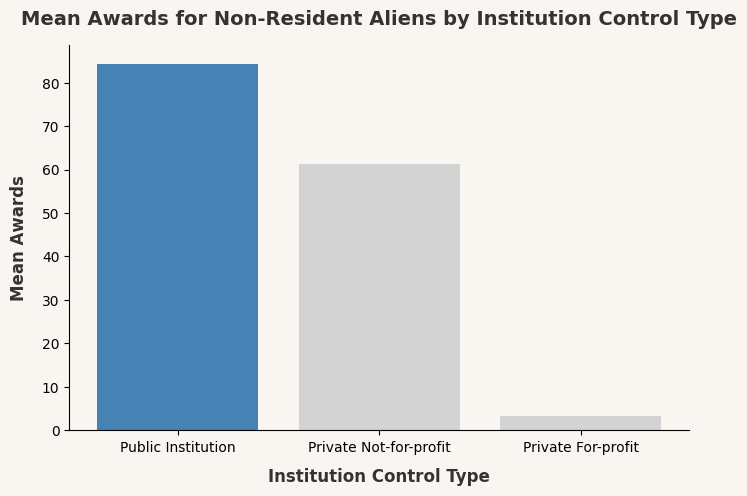

In [ ]:



degree_df.rename(columns={'UNITID': 'institution_id'}, inplace=True)

# Merge datasets to include the institution control type
merged_df = pd.merge(degree_df, uni_df[['institution_id', 'control']], on='institution_id', how='left')

# Define control type labels
control_labels = {
    1: 'Public Institution',
    2: 'Private Not-for-profit',
    3: 'Private For-profit'
}

# Group by control type and calculate mean awards for non-resident aliens
control_nonresident_stats = merged_df.groupby('control')['awards_nonresident_alien_total'].mean()

# Rename index for better readability
control_nonresident_stats.index = control_nonresident_stats.index.map(control_labels)

# Create the bar chart without grid lines
plt.figure(figsize=(8, 5), facecolor="#f9f6f1")  # Light beige background

# Create bars with adjusted colors
bars = plt.bar(control_nonresident_stats.index, control_nonresident_stats, color=['#4682B4', '#D3D3D3', '#D3D3D3'])

# Customize the plot aesthetics
plt.xlabel("Institution Control Type", fontsize=12, fontweight='bold', labelpad=10, color="#333333")
plt.ylabel("Mean Awards", fontsize=12, fontweight='bold', labelpad=10, color="#333333")
plt.title("Mean Awards for Non-Resident Aliens by Institution Control Type", fontsize=14, fontweight='bold', pad=15, color="#333333")

# Remove border lines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Remove grid lines
plt.grid(False)

# Set background color of axes to match overall theme
plt.gca().set_facecolor("#f9f6f1")

# Show the plot
plt.show()


### This is Just Comparing Institution Size and Control Type

<ipython-input-45-c5c0ed06eff7>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations = df.applymap(lambda x: f"{x:.1f}%")


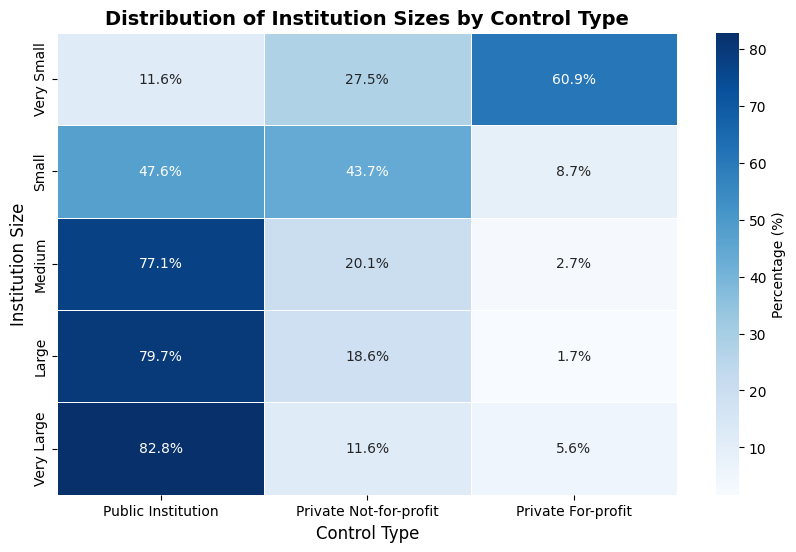

In [ ]:
# Function to filter institution sizes
def filter_institution_sizes(df, valid_sizes):
    # Filters institution sizes to only include specified values.
    return df[df['institution_size'].isin(valid_sizes)]

# Function to create pivot table
def create_pivot_table(df, index_col, column_col):
    # Creates a pivot table showing the percentage distribution of institution sizes across control types.
    pivot_table = df.pivot_table(index=index_col, columns=column_col, aggfunc='size', fill_value=0)
    return pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Function to plot institution size distribution
def plot_institution_size_distribution(df, size_labels, control_labels):
    # Plots a heatmap showing the distribution of institution sizes by control type.
    df.rename(index=size_labels, columns=control_labels, inplace=True)
    annotations = df.applymap(lambda x: f"{x:.1f}%")

    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(df, annot=annotations, fmt="", cmap="Blues", linewidths=0.5, cbar_kws={'label': 'Percentage (%)'})

    plt.title("Distribution of Institution Sizes by Control Type", fontsize=14, fontweight='bold')
    plt.xlabel("Control Type", fontsize=12)
    plt.ylabel("Institution Size", fontsize=12)
    plt.xticks(rotation=0, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Define labels for institution sizes and control types
institution_size_labels = {
    1: 'Very Small',
    2: 'Small',
    3: 'Medium',
    4: 'Large',
    5: 'Very Large'
}

control_labels = {
    1: 'Public Institution',
    2: 'Private Not-for-profit',
    3: 'Private For-profit'
}

# Process data
filtered_df = filter_institution_sizes(uni_df, [1, 2, 3, 4, 5])
pivot_table_percentage = create_pivot_table(filtered_df, 'institution_size', 'control')

# Plot results
plot_institution_size_distribution(pivot_table_percentage, institution_size_labels, control_labels)
